In [1]:
import matplotlib as mplt
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace,sin,cos
from numpy import pi
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
import scipy
from scipy import stats
from scipy.integrate import odeint
from scipy.signal import find_peaks

In [2]:
# This function validates that we have downloaded the file correctly
import hashlib
def md5(fname):
    hash_md5 = hashlib.md5()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

md5sum = md5('Coursework_data.h5py')
if md5sum == '6108465af8c08a7def826ebb38db4314':
    print('This is the right file!')
else:
    print('There might be a problem with this file.')

# And here's how we actually read the data
import h5py

cwf = h5py.File('Coursework_data.h5py', 'r')
data = cwf['data'][:]
signal_1 = cwf['signal_1'][:]
signal_2 = cwf['signal_2'][:]
signal_3 = cwf['signal_3'][:]
cwf.close()

This is the right file!


## Modelling 4th signal

In [3]:
M_sol = 4.92e-6
m1 = 40*M_sol
m2 = 40*M_sol
Mt = m1 + m2
mu = (m1*m2)/(m1 + m2)
n = mu/Mt 
Mc = (n**(3/5))*Mt

In [4]:
t = np.arange(0,3.7608*1024)/1024

def Equation_1(F_phi,t):
    F,phi = F_phi
    
    dfdt = ((96/(5*pi*(Mc**2))) * (pi*Mc*F)**(11/3))
    dydt = 2*pi*F
    
    return dfdt, dydt

In [5]:
F_phi_0 = (10,0)
h = odeint(Equation_1,F_phi_0,t)

In [6]:
signal4 = (h[:,0]**(2/3))*np.cos(h[:,1])

(0, 500)

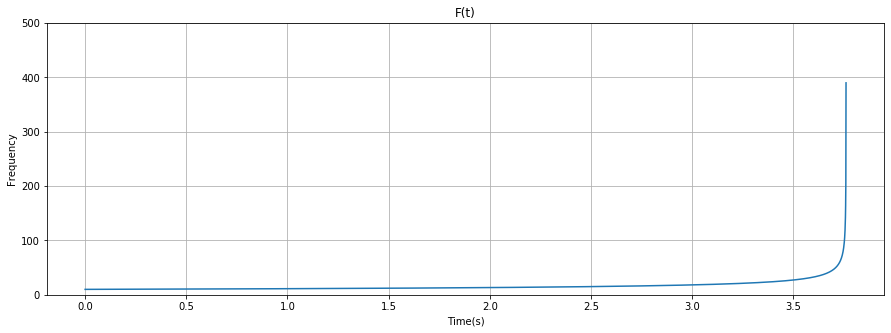

In [7]:
plt.figure(figsize = (15,5))
plt.plot(t, h[:,0])
plt.grid()
plt.title("F(t)")
plt.ylabel("Frequency")
plt.xlabel("Time(s)")
plt.ylim([0,500])

Text(0.5, 0, 'Time(s)')

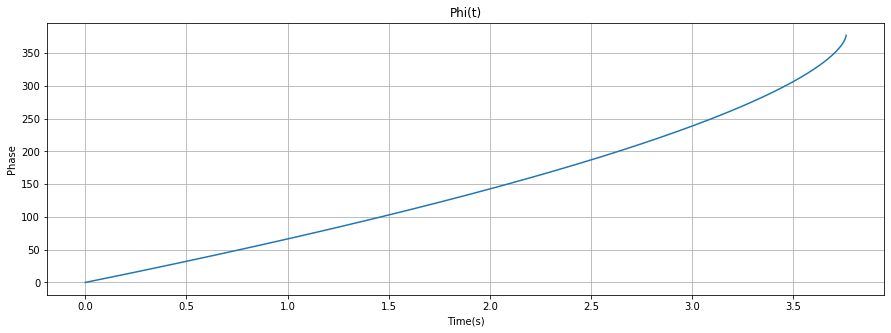

In [8]:
plt.figure(figsize = (15,5))
plt.plot(t,h[:,1])
plt.grid()
plt.title("Phi(t)")
plt.ylabel("Phase")
plt.xlabel("Time(s)")

## Normalising signal 4

84135.03404197913


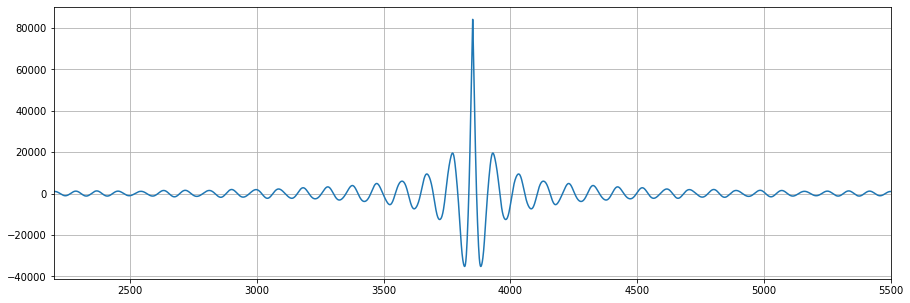

In [9]:
G = signal.correlate(signal4,signal4)
plt.figure(figsize = (15,5))
plt.plot(G)
plt.grid()
plt.xlim(2200,5500)

print(max(G))

In [10]:
Z = max(G)**0.5
print(Z)

290.0603972312993


In [11]:
#np.ndarray.flatten code retirived from:
#https://stackoverflow.com/questions/15923081/valueerror-object-too-deep-for-desired-array-while-using-convolution
signal_4 = np.ndarray.flatten(signal4/Z)

0.9999999999999999


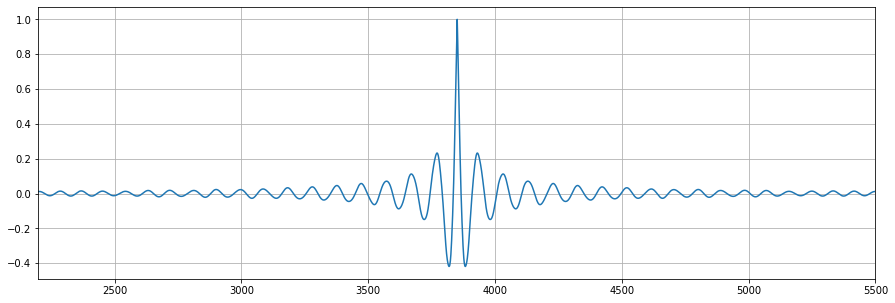

In [12]:
K = signal.correlate(signal_4,signal_4)
plt.figure(figsize = (15,5))
plt.plot(K)
plt.grid()
plt.xlim(2200,5500)

print(max(K))

## Plotting the signals (1,2,3, & 4)

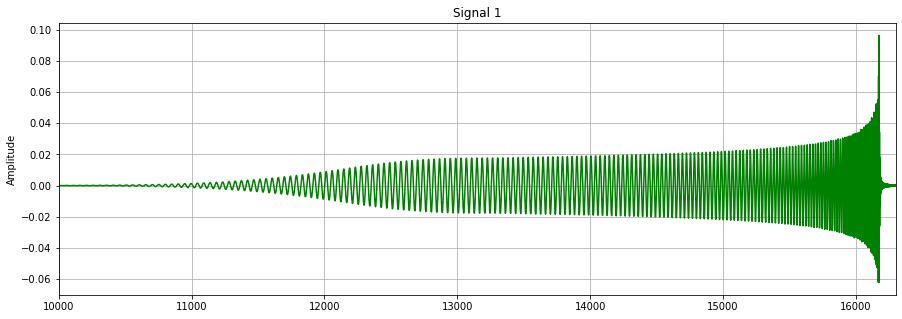

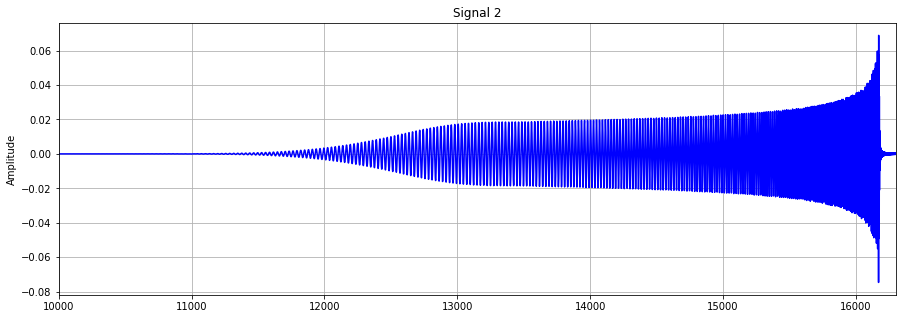

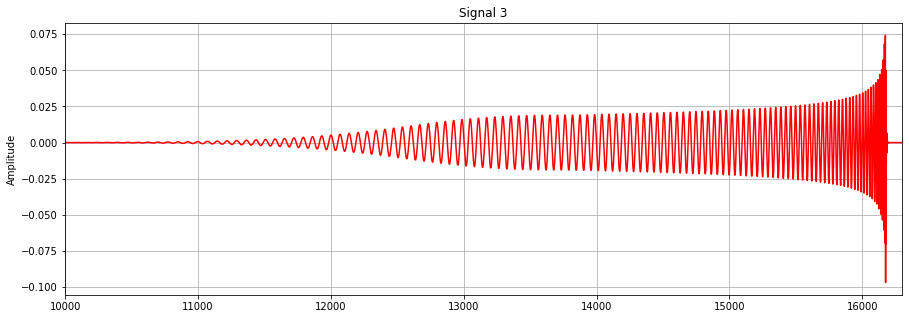

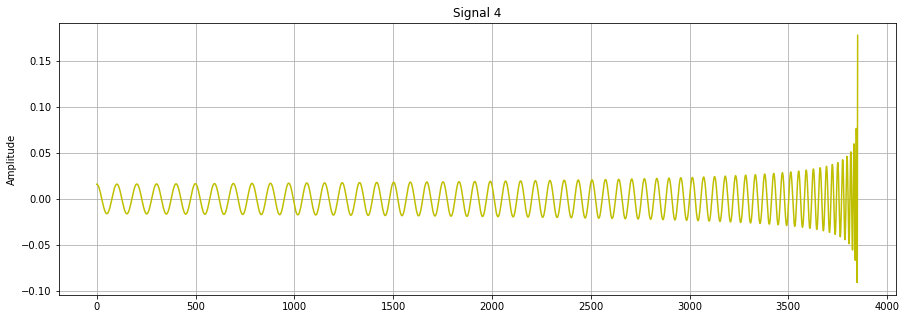

In [13]:
plt.figure(figsize = (15,5))
plt.plot(signal_1,c='g')
plt.title('Signal 1')

plt.ylabel("Amplitude")
plt.xlim([10000,16300])
plt.grid()

plt.figure(figsize = (15,5))
plt.plot(signal_2,c='b')
plt.title('Signal 2')

plt.ylabel("Amplitude")
plt.xlim([10000,16300])
plt.grid()

plt.figure(figsize = (15,5))
plt.plot(signal_3,c='r')
plt.title('Signal 3')

plt.ylabel("Amplitude")
plt.xlim([10000,16300])
plt.grid()

plt.figure(figsize = (15,5))
plt.plot(signal_4,c='y')
plt.title('Signal 4')

plt.ylabel("Amplitude")
plt.grid()

## Fourier transform of data

In [ ]:
data_frequency_domain = np.fft.fft(data)

frequency = np.linspace(0,1024,16384000)

plt.figure(figsize = (15,6))
plt.plot(frequency,data_frequency_domain.real)
plt.plot(frequency,data_frequency_domain.imag)
plt.xlim([0,7])
plt.title("Far left of data") 
plt.xlabel('Frequency(Hz)')
plt.legend(['Real component','Imag component'])


plt.figure(figsize = (15,6))
plt.plot(frequency,data_frequency_domain.real) #* 1/data.size)
plt.plot(frequency,data_frequency_domain.imag) #* 1/data.size)
plt.xlim([1017,1024])
plt.title("Far right of data")
plt.xlabel('Frequency(Hz)')
plt.legend(['Real component','Imag component'])

## Using highpass filter to filter noise out of data.

In [ ]:
## retreived from  Lecture_DA_1_Fourier_filters_with_examples written by Ian Harry.
def highpass_filter_scipy(data, sample_rate):

    filter_stop_freq = 9 # Hz
    filter_pass_freq = 10  # Hz

    filter_order = 1025

    # High-pass filter
    nyquist_rate = sample_rate / 2.
    desired = (0, 0, 1, 1) 
    bands = (0, filter_stop_freq, filter_pass_freq, nyquist_rate)
    filter_coefs = scipy.signal.firls(filter_order, bands, desired, nyq=nyquist_rate)

    # Apply high-pass filter
    filtered_data = scipy.signal.filtfilt(filter_coefs, [1], data)
    return filtered_data

In [ ]:
data_highpass = highpass_filter_scipy(data, 1024)

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(data_highpass)
plt.grid()
plt.title("Filtered Data")

## Cross correlation of signal 4 with other three signals.

In [ ]:
#scipy.signal.correlate was retrieved from:
#https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.correlate.html

M = signal.correlate(signal_1,signal_4)
plt.figure(figsize = (15,5))
plt.plot(M)
plt.grid()

print(max(M))

In [ ]:
V = signal.correlate(signal_2,signal_4)
plt.figure(figsize = (15,5))
plt.plot(V)
plt.grid()
print(max(V))

In [ ]:
B = signal.correlate(signal_3,signal_4)
plt.figure(figsize = (15,5))
plt.plot(B)
plt.grid()
print(max(B))

## Cross-correlation of the data with all 4 signals to locate where the signals are and their strength.

In [ ]:
# np.correlate was retrieved from:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.correlate.html

corr_1 = np.correlate(data,signal_1)
plt.figure(figsize = (15,6))
plt.plot(corr_1)
plt.ylabel("Cross Correlation")
plt.grid()
plt.title("Cross Correlation of data with signal 1")
plt.axhline(y=5.996897012816318, color='y')
plt.axhline(y=-5.996897012816318, color='y')

In [ ]:
corr_2 = np.correlate(data,signal_2)
plt.figure(figsize = (15,6))
plt.plot(corr_2)
plt.ylabel("Cross Correlation")
plt.grid()
plt.title("Cross Correlation of data with signal 2")
plt.axhline(y=5.979372279304248, color='y')
plt.axhline(y=-5.979372279304248, color='y')

In [ ]:
print(max(abs(corr_2)))

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(corr_2)
plt.ylabel("Cross Correlation")
plt.grid()
plt.ylim(-10,10)
plt.title("Cross Correlation of data with signal 2")
plt.axhline(y=5.59381, color='y')
plt.axhline(y=-5.59381, color='y')

In [ ]:
corr_3 = np.correlate(data,signal_3)
plt.figure(figsize = (15,6))
plt.plot(corr_3)
plt.ylabel("Cross Correlation")
plt.grid()
plt.title("Cross Correlation of data with signal 3")
plt.axhline(y=6.0081460107154605, color='y')
plt.axhline(y=-6.0081460107154605, color='y')

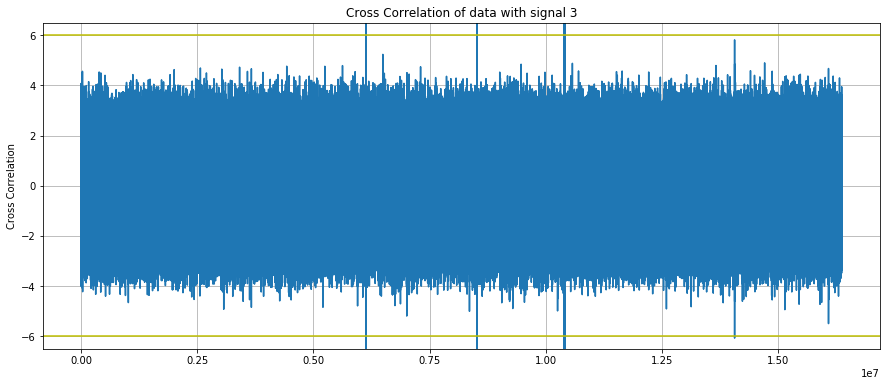

In [345]:
plt.figure(figsize = (15,6))
plt.plot(corr_3)
plt.ylim(-6.5,6.5)
plt.ylabel("Cross Correlation")
plt.grid()
plt.title("Cross Correlation of data with signal 3")
plt.axhline(y=6.0081460107154605, color='y')
plt.axhline(y=-6.0081460107154605, color='y')

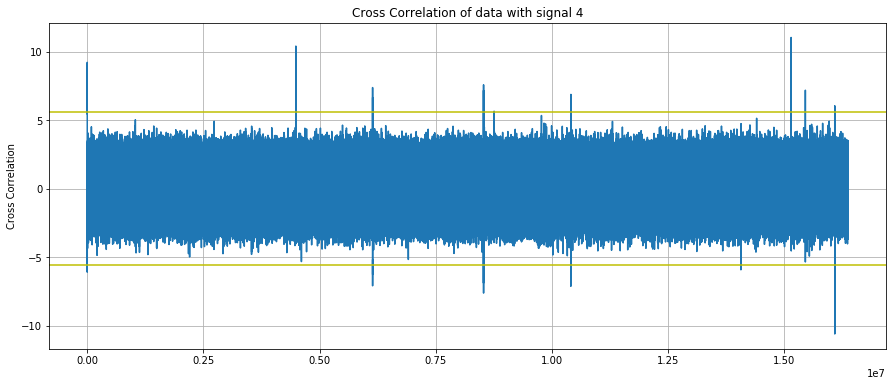

In [342]:
corr_4 = np.correlate(data_highpass,signal_4)
plt.figure(figsize = (15,6))
plt.plot(corr_4)
plt.ylabel("Cross Correlation")
plt.grid()
plt.title("Cross Correlation of data with signal 4")
plt.axhline(y=5.979372279304248, color='y')
plt.axhline(y=-5.979372279304248, color='y')

## Isolating present signals in the data

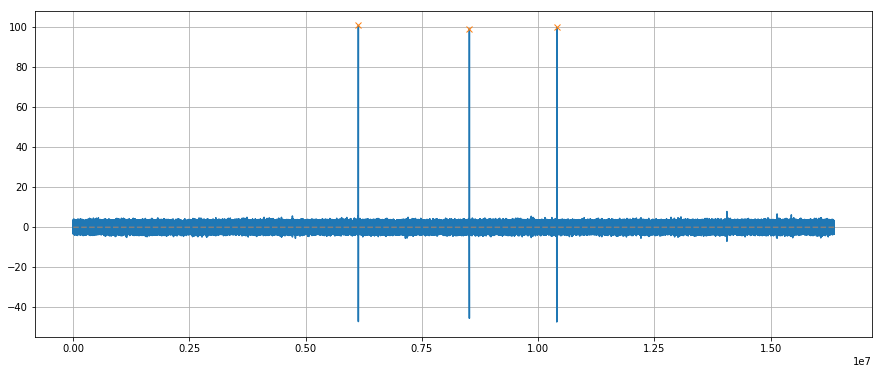

[ 6132924  8520995 10400639]


In [348]:
x = corr_1
peaks, _ = find_peaks(x,height=80)
plt.figure(figsize = (15,6))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.grid()
plt.show()
print(peaks)

#peak finding code found at:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

(800000, 2000000)

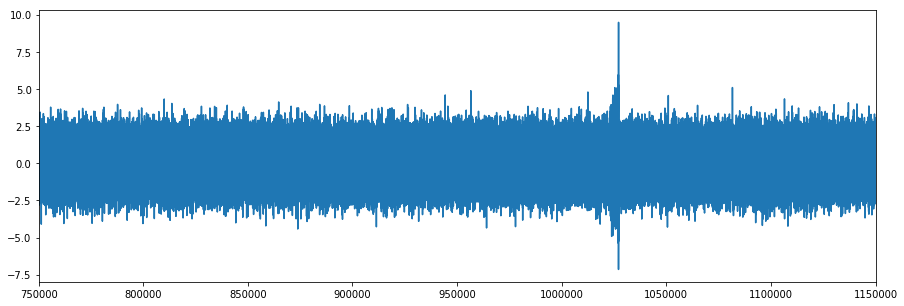

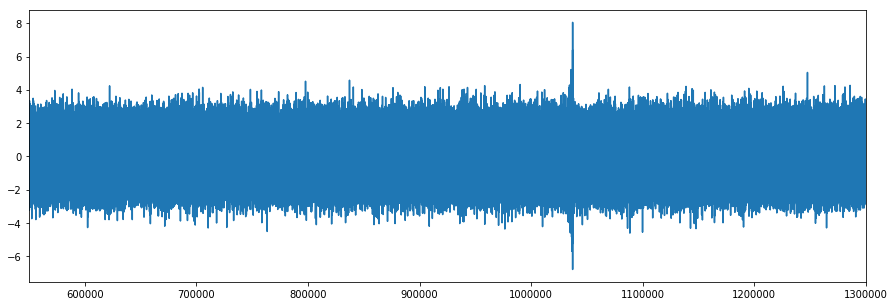

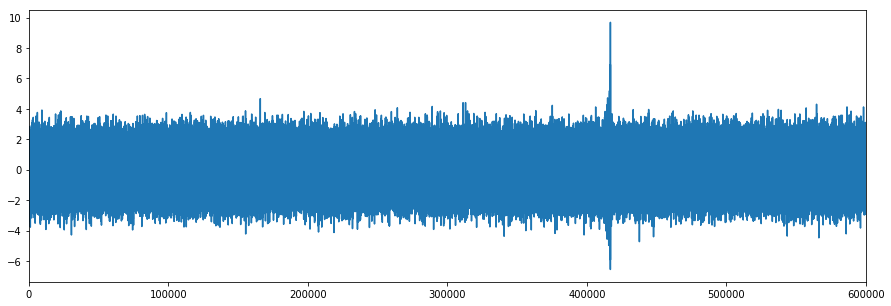

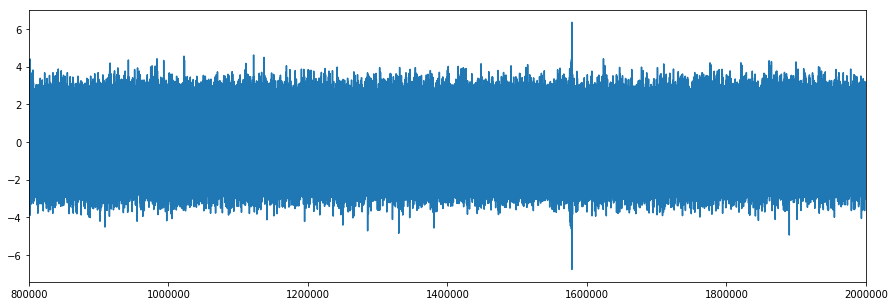

In [107]:
plt.figure(figsize = (15,5))
plt.plot(data_highpass[5121924:7143924])
plt.xlim(750000,1150000)
plt.title("")

plt.figure(figsize = (15,5))
plt.plot(data_highpass[7500000:10000000])
plt.xlim(550000,1300000)
plt.title("")


plt.figure(figsize = (15,5))
plt.plot(data_highpass[10000000:11200000])
plt.xlim(0,600000)

plt.figure(figsize = (15,5))
plt.plot(data_highpass[12500000:15000000])
plt.xlim(800000,2000000)

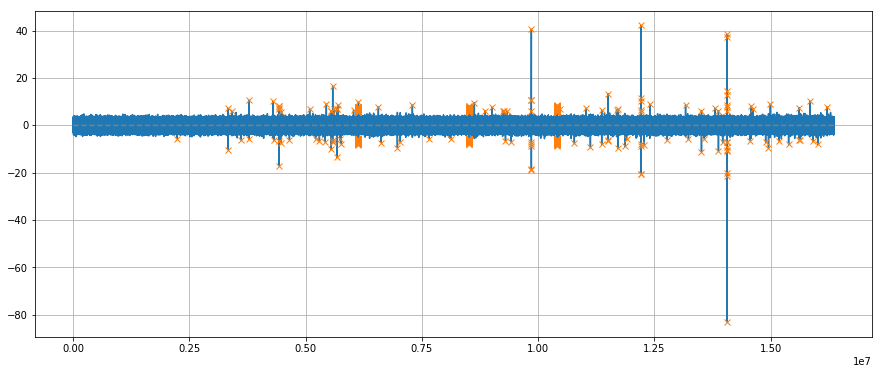

[ 2234589  3325214  3325223  3413896  3606451  3780338  3780348  4291206
  4319965  4430720  4430729  4430732  4430740  4430747  4430750  4461791
  4478657  4649863  5085331  5211594  5294823  5415241  5444038  5540214
  5540223  5540233  5581078  5581080  5581088  5581098  5614883  5669080
  5669088  5669096  5695995  5732736  5763504  6029338  6133238  6133243
  6133270  6133337  6133500  6133507  6133539  6133556  6133614  6133648
  6133655  6133672  6133681  6133716  6133725  6133733  6133743  6133761
  6133770  6133780  6133789  6133799  6133862  6133872  6133929  6133968
  6133987  6133999  6134007  6134028  6134059  6134068  6134088  6134109
  6134117  6134128  6134140  6134149  6134160  6134169  6134179  6134202
  6134213  6134235  6134245  6134255  6134266  6134276  6134289  6134299
  6134332  6134342  6134352  6134363  6134376  6134387  6134397  6134408
  6134431  6134441  6134454  6134465  6134476  6134487  6134497  6134509
  6134521  6134533  6134557  6134567  6134570  6134

In [347]:
x = corr_2
peaks, _ = find_peaks(abs(x),height=5.59381) #5.979372279304248
plt.figure(figsize = (15,6))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.grid()
plt.show()
print(peaks)

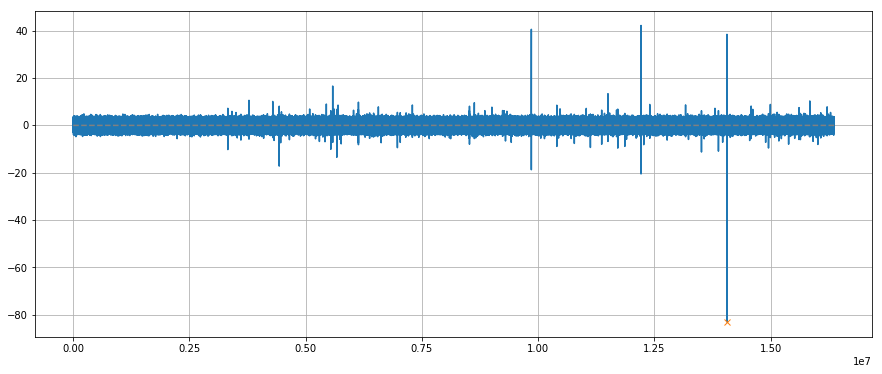

[14062172]


In [390]:
x = corr_2
peaks, _ = find_peaks(abs(x),height=50) #5.979372279304248
plt.figure(figsize = (15,6))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.grid()
plt.show()
print(peaks)

In [ ]:
14061028 14061108 14061316 14061353

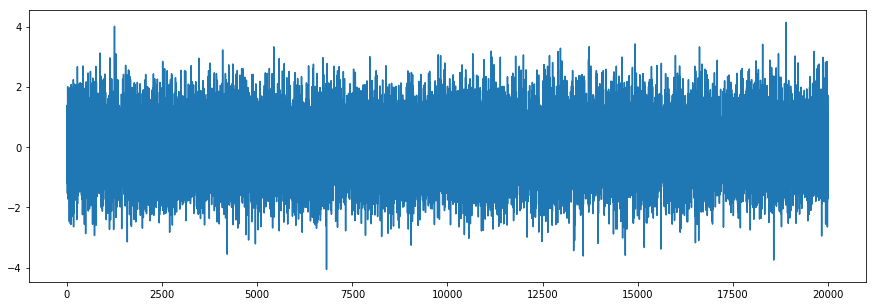

In [93]:
plt.figure(figsize = (15,5))
plt.plot(data_highpass[9843992:9863992])
#plt.xlim(0,600000)

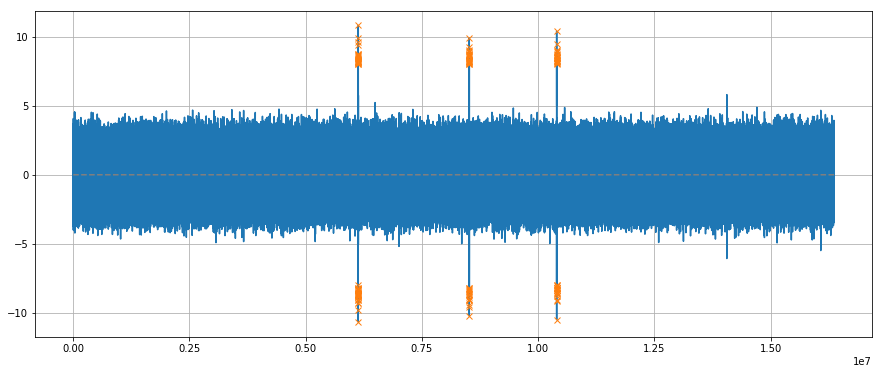

[ 6130293  6130419  6130422  6130606  6130624  6130642  6130645  6130666
  6130687  6130710  6130726  6130744  6130746  6130749  6130766  6130786
  6130825  6130845  6130863  6130865  6130884  6130888  6130903  6130924
  6130942  6130998  6131018  6131020  6131035  6131038  6131040  6131131
  6131152  6131204  6131221  6131224  6131329  6131348  6131364  6131470
  6131486  6131504  6131520  6131586  6131603  6131622  6131779  6131781
  6131795  6131812  6131963  6132079  8518407  8518426  8518429  8518447
  8518451  8518554  8518637  8518654  8518658  8518675  8518678  8518718
  8518758  8518818  8518837  8518840  8518857  8518877  8518896  8518916
  8518994  8519014  8519032  8519034  8519050  8519070  8519089  8519255
  8519258  8519275  8519294  8519365  8519610  8519624  8519642  8519659
  8519882  8519898 10398007 10398052 10398069 10398114 10398219 10398241
 10398321 10398341 10398361 10398386 10398402 10398422 10398442 10398461
 10398464 10398540 10398561 10398657 10398752 10398

In [94]:
x = corr_3
peaks, _ = find_peaks(abs(x),height=8)
plt.figure(figsize = (15,6))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.grid()
plt.show()
print(peaks)

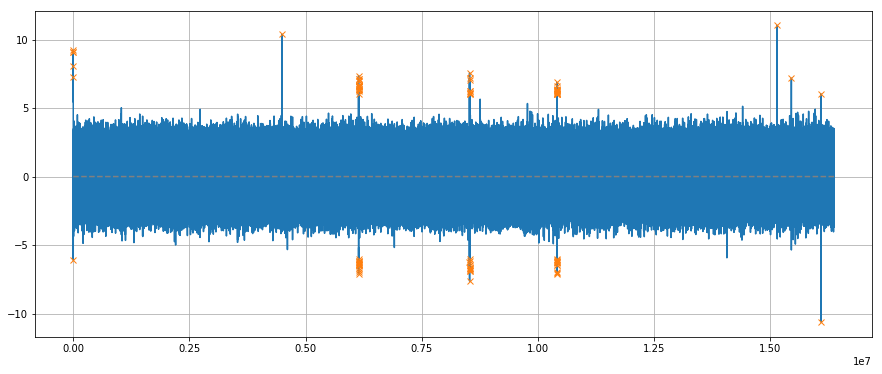

[       8       12       14       18       25       67  4490932  6141865
  6141887  6141890  6141950  6142177  6142181  6142183  6142326  6142385
  6142406  6142445  6142462  6142464  6142602  6142641  6142682  6142777
  6142834  6142850  6142853  6142908  6142910  6143021  6143038  6143041
  6143308  6143375  6143744  6143884  6144248  6144369  6144410  6144720
  8530083  8530230  8530394  8530416  8530456  8530477  8530497  8530713
  8530730  8530732  8530810  8531203  8531308  8531430  8531432  8531533
  8531587  8531651  8531700  8531924  8532347 10409579 10409582 10409599
 10410039 10410140 10410179 10410183 10410199 10410298 10410318 10410321
 10410375 10410396 10410398 10410475 10410566 10410587 10410642 10410754
 10410773 10410777 10410828 10410844 10411210 10411261 10411878 10412186
 15152501 15459003 16091852 16091855]


In [321]:
x = corr_4
peaks, _ = find_peaks(abs(x),height=5.979372279304248)
plt.figure(figsize = (15,6))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.grid()
plt.show()
print(peaks)

In [ ]:
16,095,703
16,091,855

## Cross-correlation of signals against each other.

0.0812838295687977


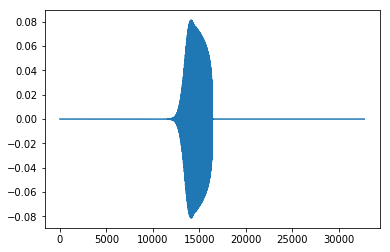

In [102]:
y = signal.correlate(signal_1,signal_3)

plt.plot(y)
print(max(abs(y)))

0.06474102927646122


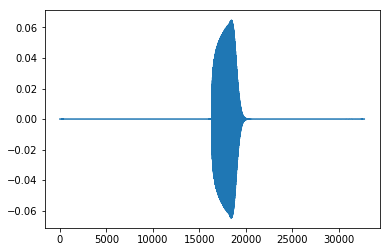

In [104]:
z = signal.correlate(signal_1,signal_2)

plt.plot(z)
print(max(abs(z)))

0.04151805124351679


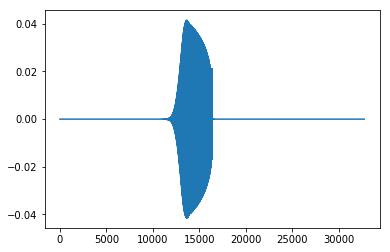

In [103]:
w = signal.correlate(signal_2,signal_3)

plt.plot(w)
print(max(abs(w)))

## Identifying delta glitches

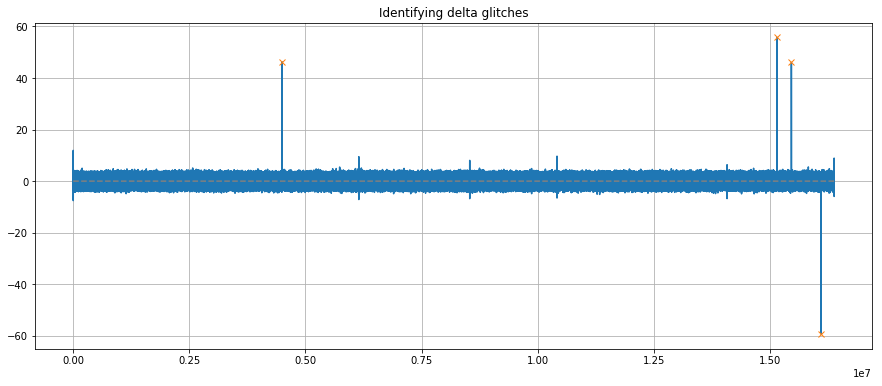

[ 4494783 15156352 15462854 16095703]


In [366]:
x = data_highpass
peaks, _ = find_peaks(abs(x),height=30)
plt.figure(figsize = (15,6))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.grid()
plt.title("Identifying delta glitches")
plt.show()
print(peaks)

Text(0.5,1,'Signal 1 cross correlated with first delta function glitch')

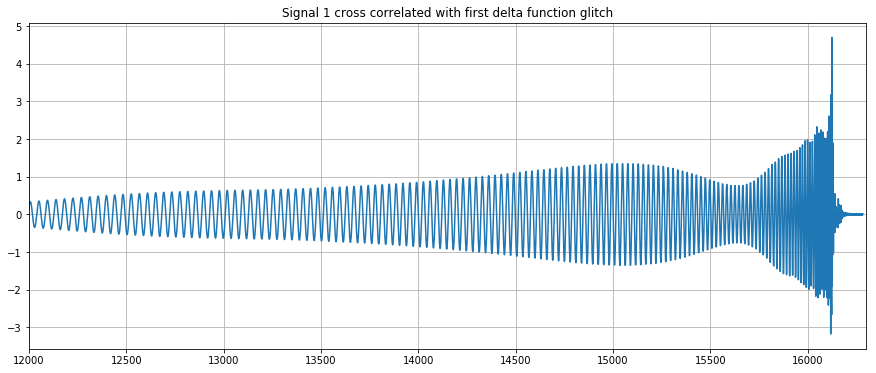

In [6]:
x = np.correlate(signal_1,data_highpass[4494733:4494833])
plt.figure(figsize = (15,6))
plt.grid()
plt.plot(x)
plt.xlim(12000,16300)
plt.title("Signal 1 cross correlated with first delta function glitch")

Text(0.5,1,'Signal 2 cross correlated with first delta function glitch')

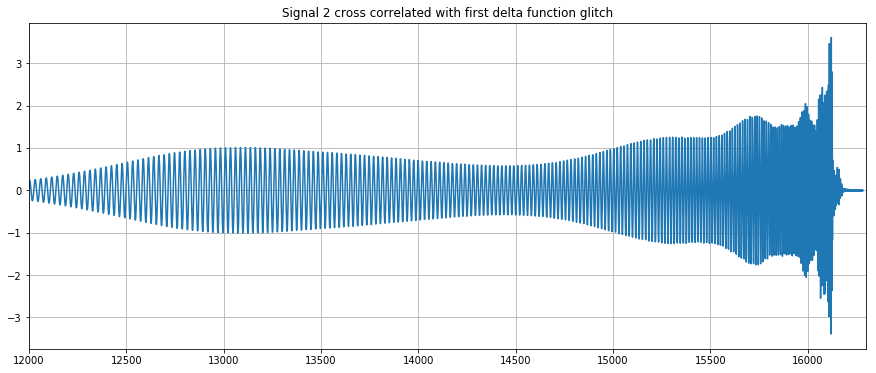

In [75]:
x = np.correlate(signal_2,data_highpass[4494733:4494833])
plt.figure(figsize = (15,6))
plt.grid()
plt.plot(x)
plt.xlim(12000,16300)
plt.title("Signal 2 cross correlated with first delta function glitch")

Text(0.5,1,'Signal 3 cross correlated with first delta function glitch')

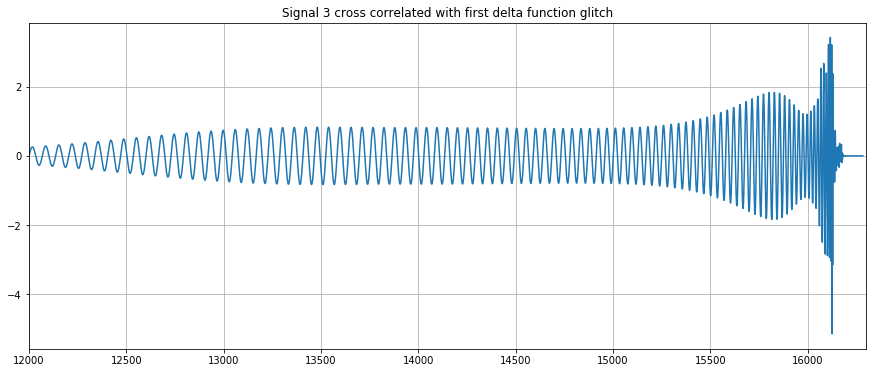

In [73]:
x = np.correlate(signal_3,data_highpass[4494733:4494833])
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(12000,16300)
plt.plot(x)
plt.title("Signal 3 cross correlated with first delta function glitch")

Text(0.5,1,'Signal 4 cross correlated with first delta function glitch')

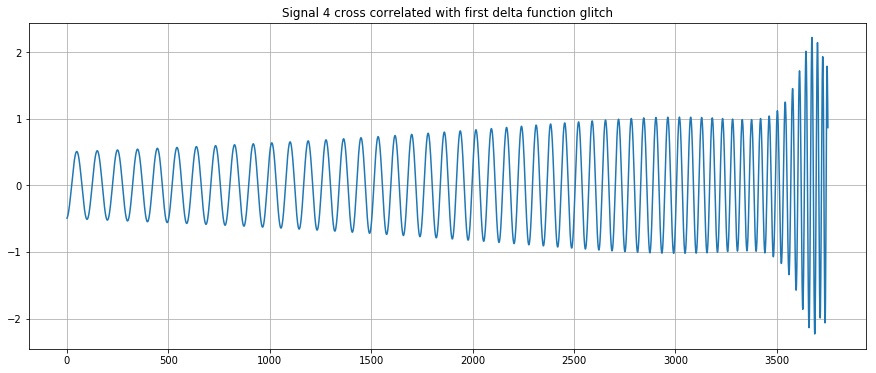

In [70]:
x = np.correlate(signal_4,data_highpass[4494733:4494833])
plt.figure(figsize = (15,6))
plt.grid()
plt.plot(x)
plt.title("Signal 4 cross correlated with first delta function glitch")

Text(0.5,1,'First delta glitch located at data point 4,494,783')

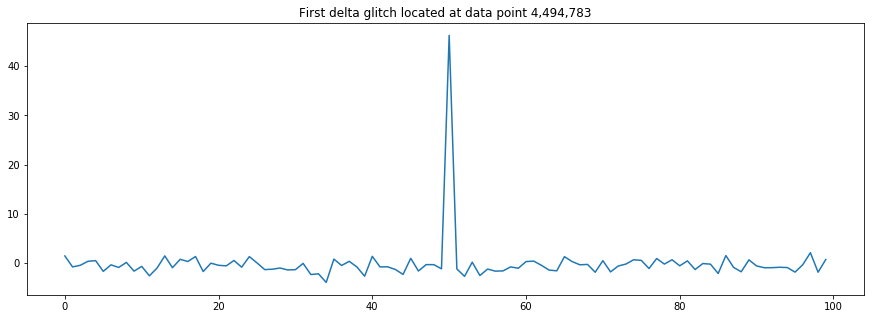

In [68]:
plt.figure(figsize = (15,5))

#print(max(abs(w)))
plt.plot(data_highpass[4494733:4494833])
#plt.xlim(2950,3050)
plt.title("First delta glitch located at data point 4,494,783")

Text(0.5,1,'Second delta glitch located at data point 15,156,352')

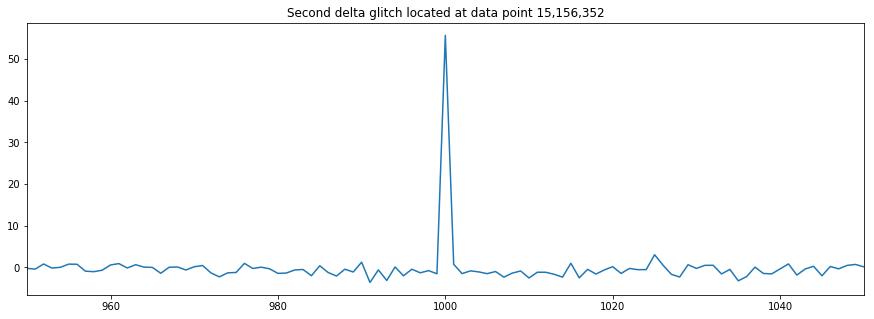

In [80]:
plt.figure(figsize = (15,5))
plt.plot(data_highpass[15155352:15157352])
plt.xlim(950,1050)
plt.title("Second delta glitch located at data point 15,156,352")

Text(0.5,1,'Third delta glitch located at data point 15,462,854')

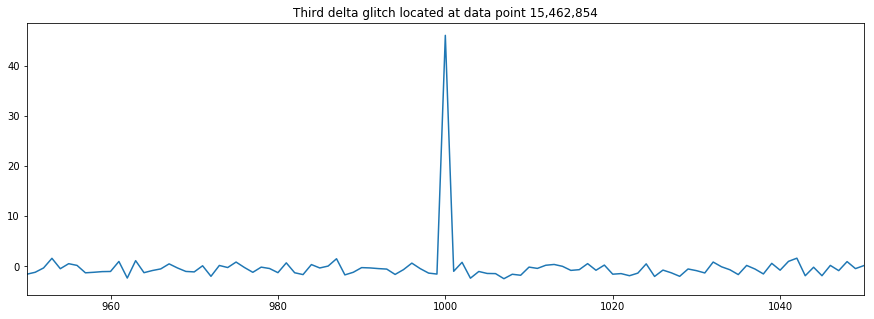

In [295]:
plt.figure(figsize = (15,5))
plt.plot(data_highpass[15461854:15463854])
plt.xlim(950,1050)
plt.title("Third delta glitch located at data point 15,462,854")

Text(0.5,1,'Fourth delta glitch located at data point 16,095,703')

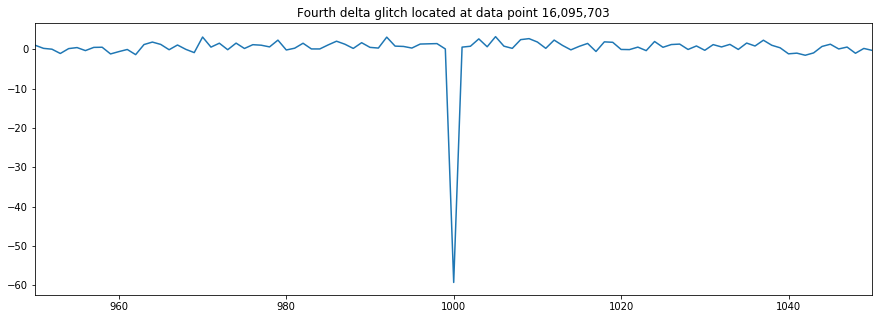

In [330]:
plt.figure(figsize = (15,5))
plt.plot(data_highpass[16094703:16096703])
plt.xlim(950,1050)
plt.title("Fourth delta glitch located at data point 16,095,703")

## Statistical analysis

5.055400167581244


0.9994828354693864

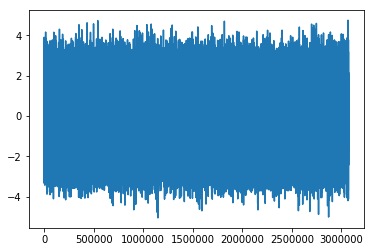

In [241]:
plt.plot(corr_1[0:3000*1024])
print(max(abs(corr_1[0:3000*1024])))
A = np.std(corr_1[0:3000*1024])
print(A)

In [264]:
Sigma_6_A = 6 * A
chance = 1/506797346
Max_val = (max(abs(corr_1[1024:3000*1024])))
print(Sigma_6_A)

num_sig = (1024*3000)*chance
print('Number of signals with strength', Sigma_6_A, 'in the first 3000 seconds of data is',num_sig)

5.996897012816318
Number of signals with strength 5.996897012816318 in the first 3000 seconds of data is 0.006061594489881169


5.593816791529012


0.9998415707138123

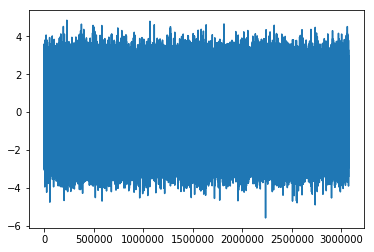

In [172]:
plt.plot(corr_2[0:3000*1024])
print(max(abs(corr_2[0:3000*1024])))
B = np.std(corr_2[0:3000*1024])
print(B)

In [262]:
Sigma_6_B = 6 * B
chance = 1/506797346
Max_val = (max(abs(corr_2[1024:3000*1024])))
print(Sigma_6_D)

num_sig = (1024*3000)*chance
print('Number of signals with strength', Sigma_6_B, 'in the first 3000 seconds of data is',num_sig)

5.979372279304248
Number of signals with strength 5.999049424282874 in the first 3000 seconds of data is 0.006061594489881169


4.92310630755305


1.0013576684525767

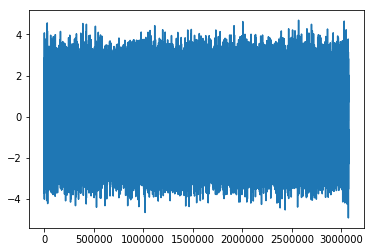

In [174]:
plt.plot(corr_3[0:3000*1024])
print(max(abs(corr_3[0:3000*1024])))
C = np.std(corr_3[0:3000*1024])
print(C)

In [261]:
Sigma_6_C = 6 * C
chance = 1/506797346
Max_val = (max(abs(corr_3[1024:3000*1024])))
print(Sigma_6_C)

num_sig = (1024*3000)*chance
print('Number of signals with strength', Sigma_6_C, 'in the first 3000 seconds of data is',num_sig)

6.0081460107154605
Number of signals with strength 6.0081460107154605 in the first 3000 seconds of data is 0.006061594489881169


5.021877880083707
0.996562046550708


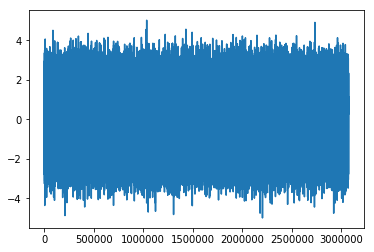

In [257]:
plt.plot(corr_4[1024:3000*1024])
print(max(abs(corr_4[1024:3000*1024])))
D = np.std(corr_4[1024:3000*1024])
print(D)

In [260]:
Sigma_6_D = 6 * D
chance = 1/506797346
Max_val = (max(abs(corr_4[1024:3000*1024])))
print(Sigma_6_D)

num_sig = (1024*3000)*chance
print('Number of signals with strength', Sigma_6_D, 'in the first 3000 seconds of data is',num_sig)

5.979372279304248
Number of signals with strength 5.979372279304248 in the first 3000 seconds of data is 0.006061594489881169


[]

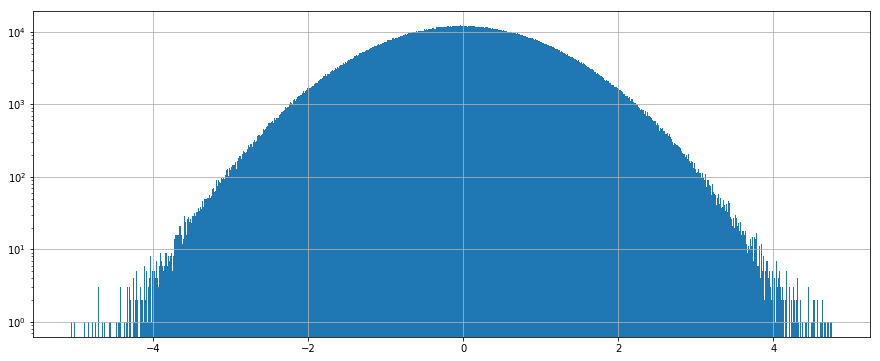

In [165]:
plt.figure(figsize = (15,6))
plt.hist(corr_1[0:3000*1024],bins=1000)
plt.grid()
plt.semilogy()
#plt.xlim(-9,9)
#plt.ylim(10e-6,10e5)

(-7.5, 7.5)

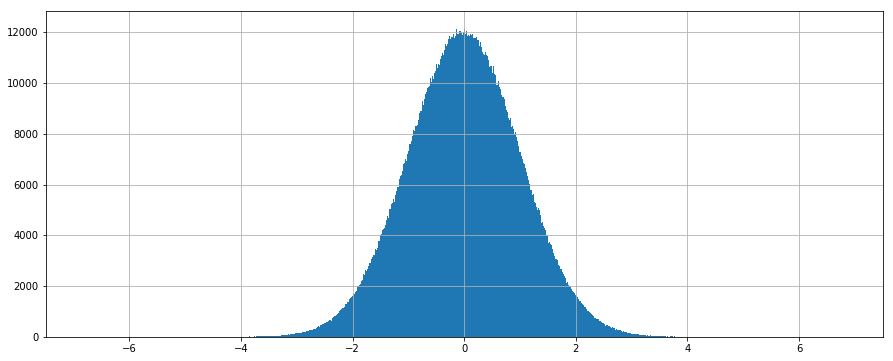

In [177]:
plt.figure(figsize = (15,6))
plt.hist(corr_1[0:3000*1024],bins=1000)
plt.grid()
plt.xlim(-7.5,7.5)

(-7.5, 7.5)

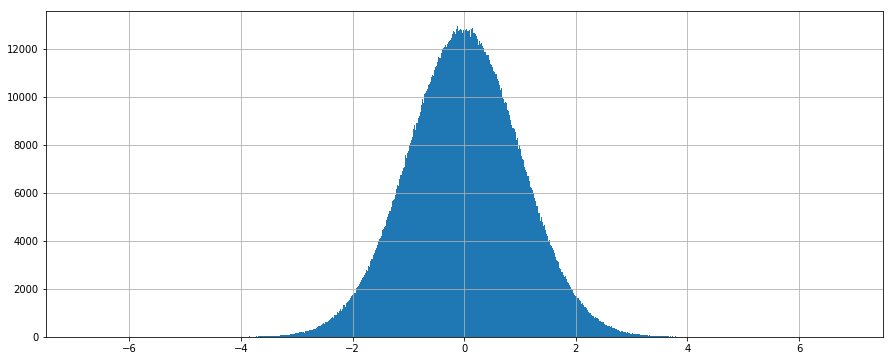

In [178]:
plt.figure(figsize = (15,6))
plt.hist(corr_2[0:3000*1024],bins=1000)
plt.grid()
plt.xlim(-7.5,7.5)

(-7.5, 7.5)

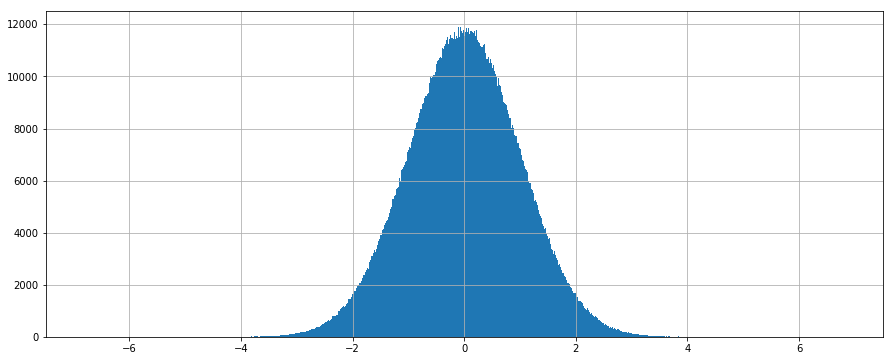

In [179]:
plt.figure(figsize = (15,6))
plt.hist(corr_3[0:3000*1024],bins=1000)
plt.grid()
plt.xlim(-7.5,7.5)

(-7.5, 7.5)

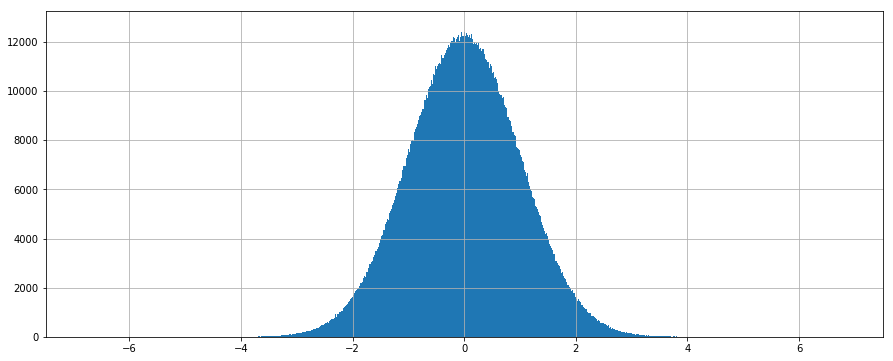

In [206]:
plt.figure(figsize = (15,6))
plt.hist(corr_4[1024:3000*1024],bins=1000)
plt.grid()
plt.xlim(-7.5,7.5)

## so for each 495,000 seconds of gaussian noise that we have in this data set, there would be one peak of 5.99.

### This shows that in the 3000 seconds of noise, there should be 0.006 values that have a value of 5.9967 and there would be even less for anything higher. and 0.032 signlsa over the whole 16,000 seconds of the data.

[]

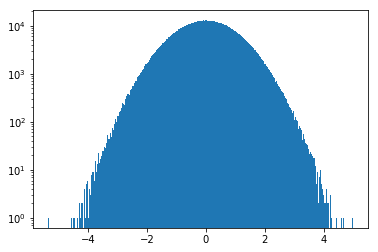

In [75]:
plt.hist(np.random.normal(0.,0.99,size=1024*3000),bins=1000);
plt.semilogy()

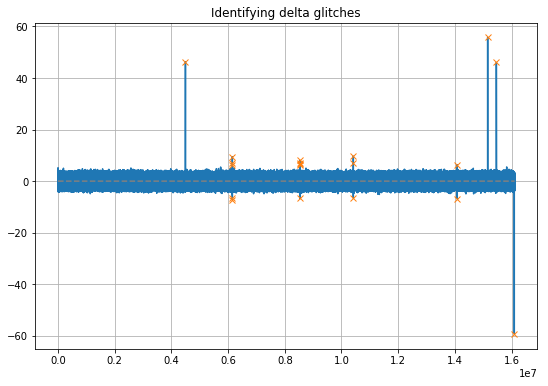

[ 4494683  6148974  6148988  6148990  6148995  6148999  8537048  8537062
  8537064  8537066  8537070 10416689 10416700 10416714 14078236 14078244
 15156252 15462754 16095603]


In [63]:
x = data_highpass[100:16105703]
peaks, _ = find_peaks(abs(x),height=6)
plt.figure(figsize = (15,6))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.grid()
plt.show()
print(peaks)

Text(0.5,1,'another signal at data point 14078244')

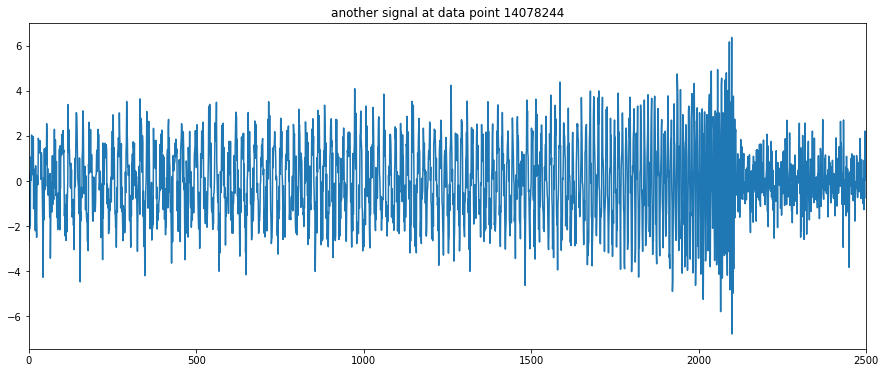

In [369]:
plt.figure(figsize = (15,6))
plt.plot(data_highpass[14076244:14079044])
plt.xlim(0,2500)
plt.title("another signal at data point 14078244")

Text(0.5,1,'another signal at data point 10416700')

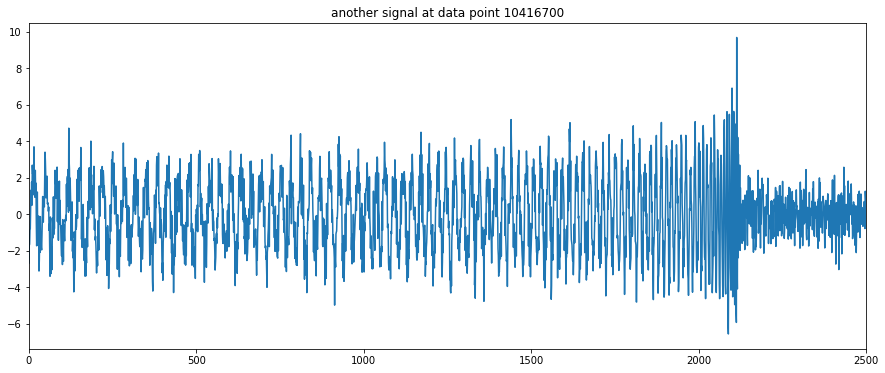

In [370]:
plt.figure(figsize = (15,6))
plt.plot(data_highpass[10414700:10417700])
plt.xlim(0,2500)
plt.title("another signal at data point 10416700")

Text(0.5,1,'another signal at data point 8537066')

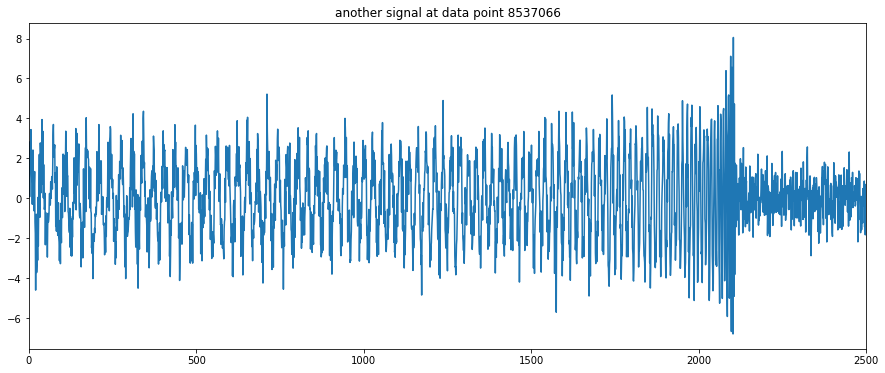

In [371]:
plt.figure(figsize = (15,6))
plt.plot(data_highpass[8535066:8538066])
plt.xlim(0,2500)
plt.title("another signal at data point 8537066")

Text(0.5,1,'another signal at data point 6149990')

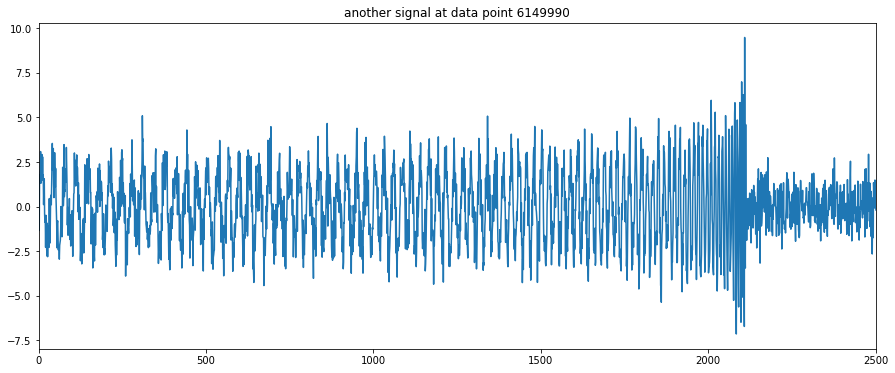

In [373]:
plt.figure(figsize = (15,6))
plt.plot(data_highpass[6146990:6149990])
plt.xlim(0,2500)
plt.title("another signal at data point 6149990")

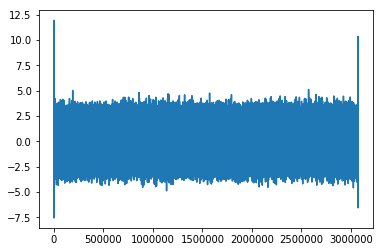

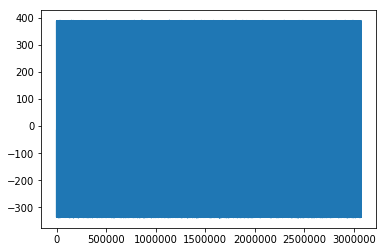

In [4]:
data_highpass = highpass_filter_scipy(data[0:3000*1024],1024)

plt.figure()
plt.plot(data_highpass)
plt.figure()
plt.plot(data[0:3000*1024])

### Cross corrolate each signal with the noise to find how strong the noise is. then take each signal thats above 5 SNR and say its a signasl and then do a histogram of type of signal against distace.

In [ ]:
Distnace = 3000/SNR_3

0.0003496670963694011


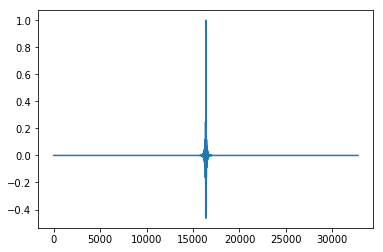

In [72]:
y = signal.correlate(signal_1,signal_1)
print(np.var(y))

plt.plot(y)

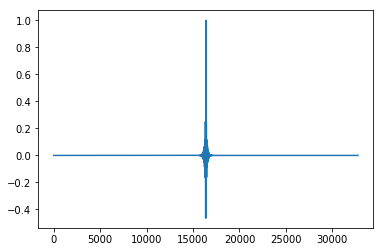

In [179]:
y = signal.correlate(signal_3,signal_3)

plt.plot(y)

In [149]:
max_detector_range = 3000/(max(abs(noise_corr)))
print(max_detector_range, 'Mpc')

593.4248329614132 Mpc


## Graph showing distance compared with SNR

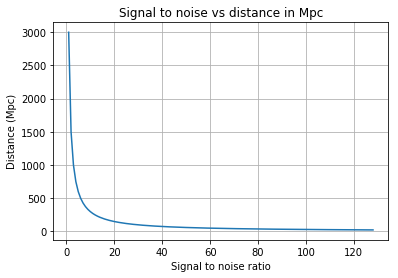

In [397]:
x = np.linspace(1,128,128)

y = 3000*(x**-1)

plt.plot(x,y)

plt.ylabel("Distance (Mpc)")

plt.xlabel("Signal to noise ratio")

plt.title("Signal to noise vs distance in Mpc")

plt.grid()

In [2]:
prediction = open('predic_noise_large')
x = prediction.read().splitlines()

In [19]:
y = np.array(x)

In [20]:
plt.hist(y[y>0.1],bins = 25)

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'float'